<a href="https://colab.research.google.com/github/Andrey-Chh/Kepler-Equation-Solution/blob/main/kepler_equation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
## 21. Уравнение Кеплера
[Каханер–Моулер–Нэш]

*Уравнение Кеплера* для вычисления орбиты имеет вид
$$
    M=E-\varepsilon\sin E,
$$
где $M$ – средняя аномалия, $E$ – эксцентрическая аномалия, $\varepsilon$ – эксцентриситет орбиты.
Пусть $M=24.851090$, $\varepsilon=0.1$. 
  * Изобразите полученную орбиту.
  * С помощью функции `scipy.optimize.brentq` найдите $E$.
  * Вычислите $E$ с помощью формулы
  $$
    E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
  $$
  где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
  * Найдите $E$ по предыдущей формуле, используя равенство
  $$
    J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
  $$

Проведите сравнение вычислительных затрат и точности результатов, полученных каждым из трех способов.

# Определения

**Эксцентрическая аномалия** $E$ — это угловое расстояние между *перицентром* и текущим положением воображаемого тела на вспомогательной круговой орбите относительно центра орбиты.

**Истинная аномалия** $\nu$ — это угловое расстояние между *перицентром* и текущей позицией тела на орбите относительно центрального тела.

**Средняя аномалия** $M$ — это угловое расстояние относительно центра орбиты между *перицентром* и текущей позицией воображаемого тела на вспомогательной круговой орбите, движущегося с постоянной угловой скоростью и проходящего через *перицентр* одновременно с реальным телом.

*Перицентр* — это точка на орбите, ближайшая к центральному телу.
***

**Эксцентриситет орбиты** $\varepsilon$ — это числовая характеристика отклонения орбиты от круговой формы.

# Решение

Импортируем необходимые библиотеки

In [50]:
import numpy as np
from scipy import optimize, special
import matplotlib.pyplot as plt
import timeit
import pandas as pd
pd.set_option("display.precision", 15) # устанавливаем точность вывода чисел с плавающей запятой

Данные константы

In [51]:
M = 24.85109
EPSILON = 0.1

### 1. Получить и изобразить орбиту.

Для получения орбиты необходимо выполнить следующие шаги:
1. Определить массив значений эксцентрической аномалии $E$.
2. Вычислить соответствующие значения истинной аномалии $\nu$, используя формулу
$$
    \nu = 2\arctan\left(\sqrt{\frac{1 + \varepsilon}{1 - \varepsilon}} \tan\frac{E}{2}\right)
$$

    
3. Вычислить соответствующие значения расстояния $r$ между центральным телом и телом, находящимся на орбите в момент времени в соответствующих точках, используя формулу
$$
    r = \frac{a(1 - e^{2})}{1 + e\cos\nu}
$$

где $a$ является большой полуосью орбиты (пусть $a$ = 1)
    
4. Преобразовать полярные координаты в декартовы, используя формулы
$$
    \begin{cases} x = r \cos\nu \\ y = r \sin\nu \end{cases}
$$

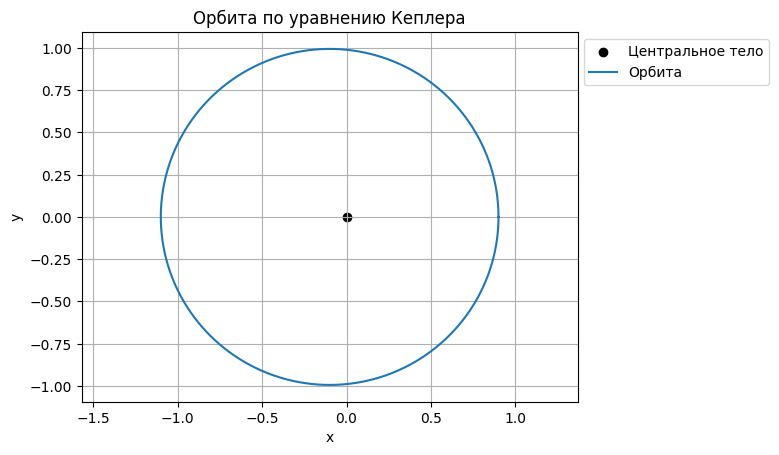

In [52]:
def calculate_true_anomaly(E):
    """Вычисляет значение истинной аномалии"""
    return 2 * np.arctan(np.sqrt((1 + EPSILON) / (1 - EPSILON)) * np.tan(E / 2))

def calculate_radius_vector(nu):
    """Вычисляет расстояние между центральным телом и телом, находящимся на орбите"""
    return (1 - EPSILON ** 2) / (1 + EPSILON * np.cos(nu))

# Создаем массив значений эксцентрической аномалии
E_vals = np.linspace(0, 2 * np.pi, 1000)

# Вычисляем соответствующие значения истинной аномалии
nu_vals = calculate_true_anomaly(E_vals)

# Вычисляем расстояние между центральным телом и телом, находящимся на орбите для каждого значения истинной аномалии
r_vals = calculate_radius_vector(nu_vals)

# Преобразуем полярные координаты в декартовы
x_vals = r_vals * np.cos(nu_vals)
y_vals = r_vals * np.sin(nu_vals)

# Строим график орбиты
plt.scatter(0, 0, label='Центральное тело', color='black') # центральное тело
plt.plot(x_vals, y_vals, label='Орбита') # орбита

plt.title('Орбита по уравнению Кеплера')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.grid(True)

plt.show()

### 2. Найти $E$ с помощью функции `scipy.optimize.brentq`.

`scipy.optimize.brentq(f, a, b)` Возвращает корень функции в заданном интервале, используя метод Брента.

Аргументы
- `f` : функция.
- `a` : левая граница интервала.
- `b` : правая граница интервала.

Возвращаемое значение
- `x0` : Корень функции в заданном интервале.

Примечания
- Функция `f` должна быть непрерывной на заданном интервале, а `f(a)` и `f(b)` должны иметь противоположные знаки.

In [53]:
def calculate_E1():
    def kepler_eq(E):
        return E - EPSILON * np.sin(E) - M

    return optimize.brentq(kepler_eq, 20, 30)

E1 = calculate_E1()
print(f"{E1 = }")

E1 = 24.820357182542907


### 3. Вычислить $E$ с помощью формулы
$$
    E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM)
$$
где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.

Для вычисления значения функции Бесселя $1$-го рода будем использовать функцию `scipy.special.jv`.

`scipy.special.jv(m, x)` возвращает значение функции Бесселя первого рода порядка `m`, с аргументом `x`.

In [54]:
def calculate_E2():
    N = 30
    m = np.arange(1, N + 1)
    result = np.sum((1 / m) * special.jv(m, m * EPSILON) * np.sin(m * M))
    return M + 2 * result

E2 = calculate_E2()
print(f"{E2 = }")

E2 = 24.820357182542907


### 4. Вычислить $E$ с помощью формулы
$$
    E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM)
$$
используя равенство
$$
    J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n + m}}{n!(m + n)!}
$$

In [55]:
def calculate_E3():
    def infinite_sum(m):
        N = 30
        n = np.arange(0, N + 1)

        numerator = ((-1) ** n) * (((m * EPSILON) / 2) ** (2 * n + m))
        denominator = special.factorial(n) * special.factorial(n + m)
        terms = numerator / denominator
        return np.sum(terms)

    N = 30
    m = np.arange(1, N + 1)
    terms = (1 / m) * np.vectorize(infinite_sum)(m) * np.sin(m * M)
    result = np.sum(terms)
    return M + 2 * result

E3 = calculate_E3()
print(f"{E3 = }")

E3 = 24.820357182542907


### 5. Сравнить точность результатов и вычислительные затраты

Для сравнения точности результатов мы будем использовать уравнение Кеплера для вычисления значений средней аномалии $M_i$ на основе найденных значений эксцентрической аномалии $E_i$. Затем мы сравним эти значения с данным значением средней аномалии $M = 24.85109$, вычислим абсолютную и относительную ошибки.

Для представления результатов сравнения мы воспользуемся объектом `DataFrame` из библиотеки `pandas`.

In [56]:
df = pd.DataFrame(columns=['E', 'абсолютная ошибка', 'относительная ошибка'])

for i, Ei in enumerate((E1, E2, E3), 1):
    Mi = Ei - EPSILON * np.sin(Ei)
    absolute_error = abs(Mi - M) 
    relative_error = absolute_error / abs(M)
    df.loc[f"E{i}"] = ([Ei, absolute_error, relative_error])

Для сравнения вычислительных затрат, измерим время, затраченное на вычисление каждого значения эксцентрической аномалии $E_i$ с использованием функции `timeit.timeit`.

***
Модуль `timeit` предоставляет функцию `timeit` для измерения времени выполнения небольших фрагментов кода.



`timeit.timeit(stmt, number)` измеряет время выполнения функции `stmt` указанное количество раз `number` и возвращает общее время выполнения.

Аргументы
- `stmt` : функция для измерения времени выполнения.
- `number` : количество повторений для измерения времени выполнения.

Возвращаемое значение
- `time` : общее время выполнения кода в секундах.

In [59]:
E1_calculation_time = timeit.timeit(stmt=calculate_E1, number=100000) * 10
E2_calculation_time = timeit.timeit(stmt=calculate_E2, number=100000) * 10
E3_calculation_time = timeit.timeit(stmt=calculate_E3, number=100000) * 10
# так как number = 100000, то E1_calculation_time равно времени выполнения функции calculate_E1 (в секундах) умноженному на 100000.
# домножив результат на 10, получим время выполнения функции calculate_E1 в микросекундах.

df["время вычисления (мксек.)"] = (E1_calculation_time, E2_calculation_time, E3_calculation_time)

Итоговая таблица "Cравнение точности результатов и вычислительных затрат" имеет следующий вид:

In [60]:
display(df)

,E,абсолютная ошибка,относительная ошибка,время вычисления (мксек.)
E1,24.820357182542907,0.0,0.0,11.341910720002488
E2,24.820357182542907,0.0,0.0,24.516221789999690
E3,24.820357182542907,0.0,0.0,883.309259310008201


# Выводы

- Все найденные значения эксцентрической аномалии $E$ являются корнями уравнения Кеплера.
- Вычисление эксцентрической аномалии с использованием функции `scipy.optimize.brentq` происходит быстрее по сравнению с другими методами вычисления.